Reading /data/lixiang/mem-pattern-recognition/new_bench/parse.res...


/home/lixiang/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/home/lixiang/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


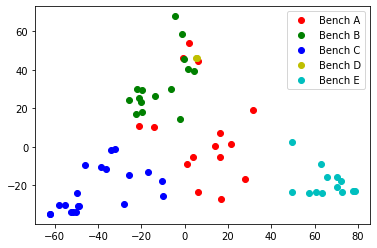

In [6]:
import sys
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
col=['ro','go','bo','yo','co','mo','wo','ko']
cluster=5
dim=2
file="parse.res"
# if sys.argc != 1:
#     print("Usage: ./cluster.py result_file")
#     exit()
# file = sys.argv[1]
if not os.path.isabs(file):
    file = os.path.join(os.getcwd(), file)
print(f"Reading {file}...")

content = open(file)
app = []
X = []
for line in content.readlines():
    tmp = line.strip().split(',')
    app.append(tmp[0])
    tmp=[t[:-1] for t in tmp[1:]]
    X.append(tmp)


clf = AgglomerativeClustering(n_clusters=cluster)
clf.fit(X, app)
y = clf.fit_predict(X)
print(y)

pca = PCA(n_components=dim)
X_pca = pca.fit_transform(X)

if dim is 3:
    plt.gca(projection='3d')

for i in range(cluster):
    if dim is 3:
        plt.plot(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2], col[i], label='Bench '+chr(i+ord('A')))
    else:
        plt.plot(X_pca[y == i, 0], X_pca[y == i, 1], col[i], label='Bench '+chr(i+ord('A')))

plt.legend(loc=0)
plt.savefig('paint.jpg')